### 서포트벡터머신(분류 모델)   

SVM은 이진 분류에서 최적의 결정경계를 찾는 머신러닝 모델이다.   
마진을 최대화하여 과적합을 방지하면서 분류 성능을 향상한다.   
로지스틱 회귀보다 비선형 데이터 분류에 적합   
커널 기법을 사용해 비선형 데이터도 분류를 가능케했다.   

마진이란?   
결정경계와 서포트 벡터 사이의 거리    
마진을 최대화하면 일반화 성능이 향상되고, 과적합을 방지할 수 있다   

서포트 벡터란?    
결정경계와 가장 가까운 데이터 포인트    
결정경계는 오직 서포트 벡터들만으로 형성되므로 연산량이 줆어든다    

결정경계 찾기   
여러 개의 가능성 있는 결정경계 중에서 마진을 최대화하는 경계를 선택   
데이터가 이상치에 민감한 경우에는 소프트 마진을 사용    



소프트 마진, 하드 마진    
이상치를 허용하지 않는 것을 하드 마진   
- 대부분의 데이터는 이상치가 있기 마련이나, 이 이상치를 허용하지 않는 경우 과적합 문제가 발생할 수 있다.    

마진을 최대화하여 과적합을 방지해 주는 것을 소프트 마진   


커널 기법   
저차원에서 데이터 결정경계선을 만들기 어려운 경우 커널 기법을 사용한다.   
커널 기법은 기존의 데이터를 고차원 공간을 확장하여 새로운 결정경계선을 만들어내는 기법이다.   

In [23]:
# 필요한 패키지 설치
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.svm import SVC
import pandas as pd
import numpy as np

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/raisin-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KimDongyoung\.cache\kagglehub\datasets\muratkokludataset\raisin-dataset\versions\1


In [25]:
df = pd.read_excel("C:/Users/KimDongyoung/.cache/kagglehub/datasets/muratkokludataset/raisin-dataset/versions/1/Raisin_Dataset/Raisin_Dataset.xlsx")
df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [26]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
df_x = df.drop(['Area','Class'],axis=1)
df_y = df[['Class']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493


In [27]:
# 학습셋과 테스트셋 분리하여 생성(6:4)

x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [28]:
# 선형 SVM 모델 성능 확인

#3차항(degree), 학습 반복횟수(max_iter) 10000 설정
svm_model = SVC(kernel = 'poly', degree = 3, gamma = 'auto', C=10, max_iter = 1000)

svm_model.fit(x_train,y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_test, y_test))

0.8425925925925926
0.8694444444444445


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# SVM C값 1~30에 따른 모델 성능 확인

scores = []
for C_point in [*range(1,31)]:
    svc=SVC(kernel='rbf',C=C_point,max_iter = 1000)
    C_model=svc.fit(x_train, y_train)
    train_score = C_model.score(x_train, y_train)
    test_score = C_model.score(x_test, y_test)
    print("rbf SVM : C:{}, train set score:{:2f}, test set score:{:2f}".format
          (C_point,train_score, test_score))
    scores.append([train_score, test_score])

rbf SVM : C:1, train set score:0.857407, test set score:0.883333
rbf SVM : C:2, train set score:0.864815, test set score:0.880556
rbf SVM : C:3, train set score:0.862963, test set score:0.886111
rbf SVM : C:4, train set score:0.861111, test set score:0.880556
rbf SVM : C:5, train set score:0.861111, test set score:0.880556
rbf SVM : C:6, train set score:0.862963, test set score:0.883333
rbf SVM : C:7, train set score:0.866667, test set score:0.883333
rbf SVM : C:8, train set score:0.864815, test set score:0.883333
rbf SVM : C:9, train set score:0.864815, test set score:0.883333


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

rbf SVM : C:10, train set score:0.864815, test set score:0.891667
rbf SVM : C:11, train set score:0.864815, test set score:0.891667
rbf SVM : C:12, train set score:0.862963, test set score:0.891667
rbf SVM : C:13, train set score:0.864815, test set score:0.891667
rbf SVM : C:14, train set score:0.864815, test set score:0.891667
rbf SVM : C:15, train set score:0.864815, test set score:0.897222
rbf SVM : C:16, train set score:0.864815, test set score:0.891667
rbf SVM : C:17, train set score:0.864815, test set score:0.891667


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

rbf SVM : C:18, train set score:0.864815, test set score:0.891667
rbf SVM : C:19, train set score:0.864815, test set score:0.891667
rbf SVM : C:20, train set score:0.864815, test set score:0.891667


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver termi

rbf SVM : C:21, train set score:0.864815, test set score:0.888889
rbf SVM : C:22, train set score:0.864815, test set score:0.883333
rbf SVM : C:23, train set score:0.864815, test set score:0.883333
rbf SVM : C:24, train set score:0.862963, test set score:0.886111
rbf SVM : C:25, train set score:0.861111, test set score:0.886111
rbf SVM : C:26, train set score:0.861111, test set score:0.888889
rbf SVM : C:27, train set score:0.862963, test set score:0.888889
rbf SVM : C:28, train set score:0.861111, test set score:0.886111
rbf SVM : C:29, train set score:0.861111, test set score:0.886111
rbf SVM : C:30, train set score:0.861111, test set score:0.886111


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver termi

In [30]:
from sklearn.svm import SVC

scores = []
for C_point in range(1, 31):
    svc = SVC(kernel='rbf', C=C_point)  # max_iter 제거 또는 더 크게, rbf 커널은 SVM에서 자주 사용하는 커널 함수이다. 
    # 비선형 데이터도 잘 분류할 수 있도록 데이터를 고차원 공간으로 매핑한다. 데이터 간의 거리를 기반으로 유사도를 계산한다. 
    model = svc.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"rbf SVM : C={C_point}, train score={train_score:.4f}, test score={test_score:.4f}")
    scores.append([train_score, test_score])

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C=1, train score=0.8574, test score=0.8833


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


rbf SVM : C=2, train score=0.8648, test score=0.8806
rbf SVM : C=3, train score=0.8630, test score=0.8861


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

rbf SVM : C=4, train score=0.8611, test score=0.8806
rbf SVM : C=5, train score=0.8611, test score=0.8806
rbf SVM : C=6, train score=0.8630, test score=0.8833
rbf SVM : C=7, train score=0.8667, test score=0.8833
rbf SVM : C=8, train score=0.8648, test score=0.8833
rbf SVM : C=9, train score=0.8648, test score=0.8833
rbf SVM : C=10, train score=0.8648, test score=0.8917
rbf SVM : C=11, train score=0.8648, test score=0.8917
rbf SVM : C=12, train score=0.8630, test score=0.8917
rbf SVM : C=13, train score=0.8648, test score=0.8917
rbf SVM : C=14, train score=0.8648, test score=0.8917


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

rbf SVM : C=15, train score=0.8648, test score=0.8972
rbf SVM : C=16, train score=0.8648, test score=0.8917
rbf SVM : C=17, train score=0.8648, test score=0.8917
rbf SVM : C=18, train score=0.8648, test score=0.8917
rbf SVM : C=19, train score=0.8648, test score=0.8917
rbf SVM : C=20, train score=0.8648, test score=0.8917
rbf SVM : C=21, train score=0.8648, test score=0.8889
rbf SVM : C=22, train score=0.8648, test score=0.8833


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

rbf SVM : C=23, train score=0.8648, test score=0.8833
rbf SVM : C=24, train score=0.8630, test score=0.8861
rbf SVM : C=25, train score=0.8611, test score=0.8861
rbf SVM : C=26, train score=0.8611, test score=0.8861
rbf SVM : C=27, train score=0.8611, test score=0.8861
rbf SVM : C=28, train score=0.8611, test score=0.8861
rbf SVM : C=29, train score=0.8611, test score=0.8861
rbf SVM : C=30, train score=0.8611, test score=0.8861


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

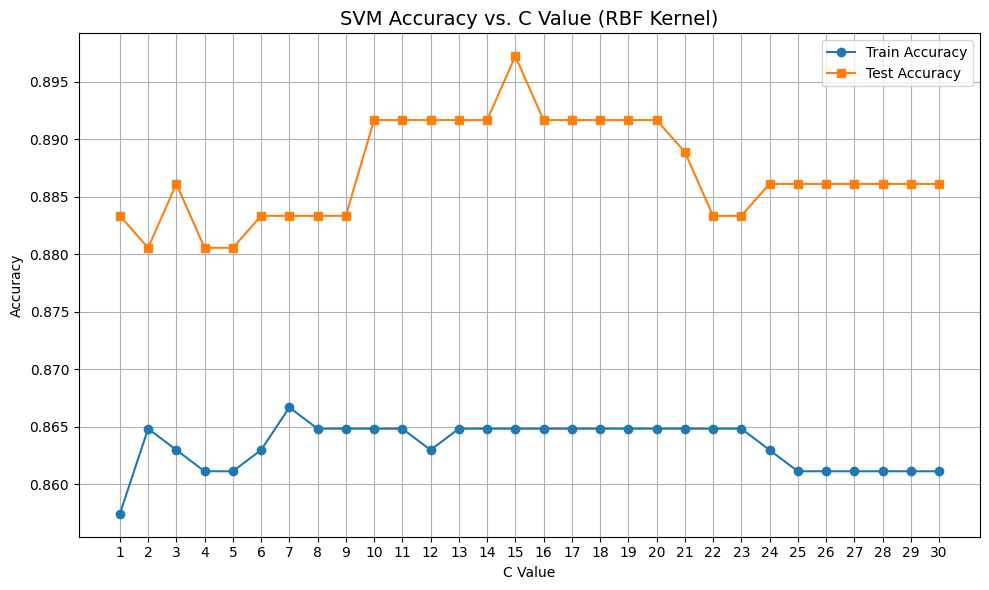

In [31]:
import matplotlib.pyplot as plt

C_values = list(range(1, 31))
train_scores = [s[0] for s in scores]
test_scores = [s[1] for s in scores]

plt.figure(figsize=(10, 6))
plt.plot(C_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(C_values, test_scores, marker='s', label='Test Accuracy')
plt.title('SVM Accuracy vs. C Value (RBF Kernel)', fontsize=14)
plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.xticks(C_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\uti

rbf SVM : gamma=0.1, train=0.8630, test=0.8667
rbf SVM : gamma=0.5, train=0.8648, test=0.8806
rbf SVM : gamma=1, train=0.8611, test=0.8778
rbf SVM : gamma=5, train=0.8630, test=0.8806
rbf SVM : gamma=10, train=0.8648, test=0.8833
rbf SVM : gamma=20, train=0.8796, test=0.8722


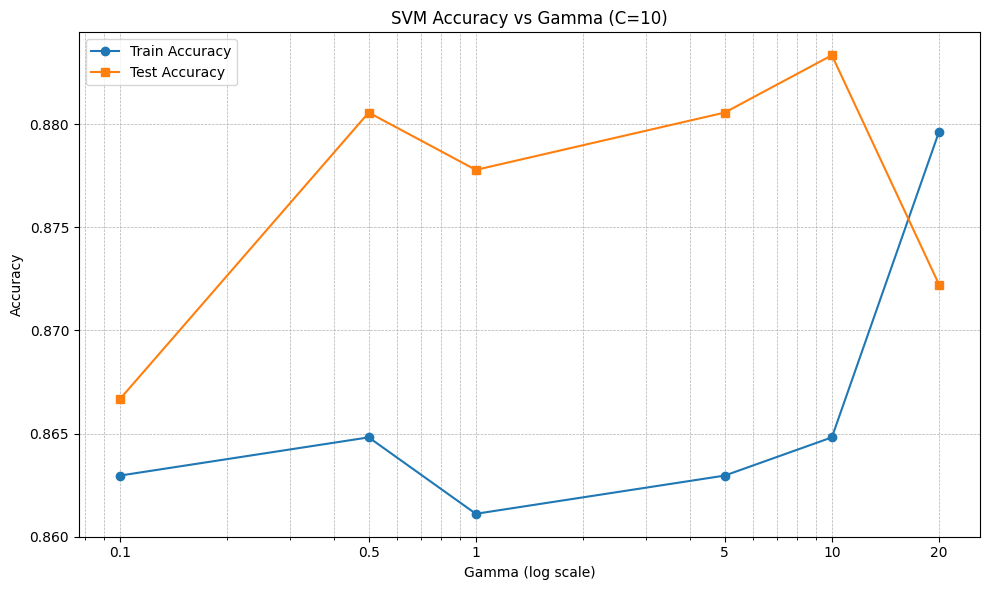

In [32]:
# gamma 실험 값
gamma_values = [0.1, 0.5, 1, 5, 10, 20]

# 정확도 저장용 리스트
scores_gamma = []

# 모델 훈련 및 정확도 저장
for gamma_point in gamma_values:
    svc = SVC(kernel='rbf', C=10, gamma=gamma_point)
    model = svc.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"rbf SVM : gamma={gamma_point}, train={train_score:.4f}, test={test_score:.4f}")
    scores_gamma.append([train_score, test_score])

# 정확도 분리
train_scores = [s[0] for s in scores_gamma]
test_scores = [s[1] for s in scores_gamma]

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(gamma_values, test_scores, marker='s', label='Test Accuracy')

plt.xscale('log')  # gamma 값이 급격히 커지므로 로그 스케일 사용
plt.xlabel('Gamma (log scale)')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy vs Gamma (C=10)')
plt.xticks(gamma_values, labels=[str(g) for g in gamma_values])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()